# Chapter 4

Let's segement the data using unsupervised techniques. We will use KMeans and NMF

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns

wholesale_str = ',Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen\n0,12669,9656,7561,214,2674,1338\n1,7057,9810,9568,1762,3293,1776\n2,6353,8808,7684,2405,3516,7844\n3,13265,1196,4221,6404,507,1788\n4,22615,5410,7198,3915,1777,5185\n5,9413,8259,5126,666,1795,1451\n6,12126,3199,6975,480,3140,545\n7,7579,4956,9426,1669,3321,2566\n8,5963,3648,6192,425,1716,750\n9,6006,11093,18881,1159,7425,2098\n10,3366,5403,12974,4400,5977,1744\n11,13146,1124,4523,1420,549,497\n12,31714,12319,11757,287,3881,2931\n13,21217,6208,14982,3095,6707,602\n14,24653,9465,12091,294,5058,2168\n15,10253,1114,3821,397,964,412\n16,1020,8816,12121,134,4508,1080\n17,5876,6157,2933,839,370,4478\n18,18601,6327,10099,2205,2767,3181\n19,7780,2495,9464,669,2518,501\n20,17546,4519,4602,1066,2259,2124\n21,5567,871,2010,3383,375,569\n22,31276,1917,4469,9408,2381,4334\n23,26373,36423,22019,5154,4337,16523\n24,22647,9776,13792,2915,4482,5778\n25,16165,4230,7595,201,4003,57\n26,9898,961,2861,3151,242,833\n27,14276,803,3045,485,100,518\n28,4113,20484,25957,1158,8604,5206\n29,43088,2100,2609,1200,1107,823\n30,18815,3610,11107,1148,2134,2963\n31,2612,4339,3133,2088,820,985\n32,21632,1318,2886,266,918,405\n33,29729,4786,7326,6130,361,1083\n34,1502,1979,2262,425,483,395\n35,688,5491,11091,833,4239,436\n36,29955,4362,5428,1729,862,4626\n37,15168,10556,12477,1920,6506,714\n38,4591,15729,16709,33,6956,433\n39,56159,555,902,10002,212,2916\n40,24025,4332,4757,9510,1145,5864\n41,19176,3065,5956,2033,2575,2802\n42,10850,7555,14961,188,6899,46\n43,630,11095,23998,787,9529,72\n44,9670,7027,10471,541,4618,65\n45,5181,22044,21531,1740,7353,4985\n46,3103,14069,21955,1668,6792,1452\n47,44466,54259,55571,7782,24171,6465\n48,11519,6152,10868,584,5121,1476\n49,4967,21412,28921,1798,13583,1163\n50,6269,1095,1980,3860,609,2162\n51,3347,4051,6996,239,1538,301\n52,40721,3916,5876,532,2587,1278\n53,491,10473,11532,744,5611,224\n54,27329,1449,1947,2436,204,1333\n55,5264,3683,5005,1057,2024,1130\n56,4098,29892,26866,2616,17740,1340\n57,5417,9933,10487,38,7572,1282\n58,13779,1970,1648,596,227,436\n59,6137,5360,8040,129,3084,1603\n60,8590,3045,7854,96,4095,225\n61,35942,38369,59598,3254,26701,2017\n62,7823,6245,6544,4154,4074,964\n63,9396,11601,15775,2896,7677,1295\n64,4760,1227,3250,3724,1247,1145\n65,85,20959,45828,36,24231,1423\n66,9,1534,7417,175,3468,27\n67,19913,6759,13462,1256,5141,834\n68,2446,7260,3993,5870,788,3095\n69,8352,2820,1293,779,656,144\n70,16705,2037,3202,10643,116,1365\n71,18291,1266,21042,5373,4173,14472\n72,4420,5139,2661,8872,1321,181\n73,19899,5332,8713,8132,764,648\n74,8190,6343,9794,1285,1901,1780\n75,20398,1137,3,4407,3,975\n76,717,3587,6532,7530,529,894\n77,12205,12697,28540,869,12034,1009\n78,10766,1175,2067,2096,301,167\n79,1640,3259,3655,868,1202,1653\n80,7005,829,3009,430,610,529\n81,219,9540,14403,283,7818,156\n82,10362,9232,11009,737,3537,2342\n83,20874,1563,1783,2320,550,772\n84,11867,3327,4814,1178,3837,120\n85,16117,46197,92780,1026,40827,2944\n86,22925,73498,32114,987,20070,903\n87,43265,5025,8117,6312,1579,14351\n88,7864,542,4042,9735,165,46\n89,24904,3836,5330,3443,454,3178\n90,11405,596,1638,3347,69,360\n91,12754,2762,2530,8693,627,1117\n92,9198,27472,32034,3232,18906,5130\n93,11314,3090,2062,35009,71,2698\n94,5626,12220,11323,206,5038,244\n95,3,2920,6252,440,223,709\n96,23,2616,8118,145,3874,217\n97,403,254,610,774,54,63\n98,503,112,778,895,56,132\n99,9658,2182,1909,5639,215,323\n100,11594,7779,12144,3252,8035,3029\n101,1420,10810,16267,1593,6766,1838\n102,2932,6459,7677,2561,4573,1386\n103,56082,3504,8906,18028,1480,2498\n104,14100,2132,3445,1336,1491,548\n105,15587,1014,3970,910,139,1378\n106,1454,6337,10704,133,6830,1831\n107,8797,10646,14886,2471,8969,1438\n108,1531,8397,6981,247,2505,1236\n109,1406,16729,28986,673,836,3\n110,11818,1648,1694,2276,169,1647\n111,12579,11114,17569,805,6457,1519\n112,19046,2770,2469,8853,483,2708\n113,14438,2295,1733,3220,585,1561\n114,18044,1080,2000,2555,118,1266\n115,11134,793,2988,2715,276,610\n116,11173,2521,3355,1517,310,222\n117,6990,3880,5380,1647,319,1160\n118,20049,1891,2362,5343,411,933\n119,8258,2344,2147,3896,266,635\n120,17160,1200,3412,2417,174,1136\n121,4020,3234,1498,2395,264,255\n122,12212,201,245,1991,25,860\n123,11170,10769,8814,2194,1976,143\n124,36050,1642,2961,4787,500,1621\n125,76237,3473,7102,16538,778,918\n126,19219,1840,1658,8195,349,483\n127,21465,7243,10685,880,2386,2749\n128,140,8847,3823,142,1062,3\n129,42312,926,1510,1718,410,1819\n130,7149,2428,699,6316,395,911\n131,2101,589,314,346,70,310\n132,14903,2032,2479,576,955,328\n133,9434,1042,1235,436,256,396\n134,7388,1882,2174,720,47,537\n135,6300,1289,2591,1170,199,326\n136,4625,8579,7030,4575,2447,1542\n137,3087,8080,8282,661,721,36\n138,13537,4257,5034,155,249,3271\n139,5387,4979,3343,825,637,929\n140,17623,4280,7305,2279,960,2616\n141,30379,13252,5189,321,51,1450\n142,37036,7152,8253,2995,20,3\n143,10405,1596,1096,8425,399,318\n144,18827,3677,1988,118,516,201\n145,22039,8384,34792,42,12591,4430\n146,7769,1936,2177,926,73,520\n147,9203,3373,2707,1286,1082,526\n148,5924,584,542,4052,283,434\n149,31812,1433,1651,800,113,1440\n150,16225,1825,1765,853,170,1067\n151,1289,3328,2022,531,255,1774\n152,18840,1371,3135,3001,352,184\n153,3463,9250,2368,779,302,1627\n154,622,55,137,75,7,8\n155,1989,10690,19460,233,11577,2153\n156,3830,5291,14855,317,6694,3182\n157,17773,1366,2474,3378,811,418\n158,2861,6570,9618,930,4004,1682\n159,355,7704,14682,398,8077,303\n160,1725,3651,12822,824,4424,2157\n161,12434,540,283,1092,3,2233\n162,15177,2024,3810,2665,232,610\n163,5531,15726,26870,2367,13726,446\n164,5224,7603,8584,2540,3674,238\n165,15615,12653,19858,4425,7108,2379\n166,4822,6721,9170,993,4973,3637\n167,2926,3195,3268,405,1680,693\n168,5809,735,803,1393,79,429\n169,5414,717,2155,2399,69,750\n170,260,8675,13430,1116,7015,323\n171,200,25862,19816,651,8773,6250\n172,955,5479,6536,333,2840,707\n173,514,7677,19805,937,9836,716\n174,286,1208,5241,2515,153,1442\n175,2343,7845,11874,52,4196,1697\n176,45640,6958,6536,7368,1532,230\n177,12759,7330,4533,1752,20,2631\n178,11002,7075,4945,1152,120,395\n179,3157,4888,2500,4477,273,2165\n180,12356,6036,8887,402,1382,2794\n181,112151,29627,18148,16745,4948,8550\n182,694,8533,10518,443,6907,156\n183,36847,43950,20170,36534,239,47943\n184,327,918,4710,74,334,11\n185,8170,6448,1139,2181,58,247\n186,3009,521,854,3470,949,727\n187,2438,8002,9819,6269,3459,3\n188,8040,7639,11687,2758,6839,404\n189,834,11577,11522,275,4027,1856\n190,16936,6250,1981,7332,118,64\n191,13624,295,1381,890,43,84\n192,5509,1461,2251,547,187,409\n193,180,3485,20292,959,5618,666\n194,7107,1012,2974,806,355,1142\n195,17023,5139,5230,7888,330,1755\n196,30624,7209,4897,18711,763,2876\n197,2427,7097,10391,1127,4314,1468\n198,11686,2154,6824,3527,592,697\n199,9670,2280,2112,520,402,347\n200,3067,13240,23127,3941,9959,731\n201,4484,14399,24708,3549,14235,1681\n202,25203,11487,9490,5065,284,6854\n203,583,685,2216,469,954,18\n204,1956,891,5226,1383,5,1328\n205,1107,11711,23596,955,9265,710\n206,6373,780,950,878,288,285\n207,2541,4737,6089,2946,5316,120\n208,1537,3748,5838,1859,3381,806\n209,5550,12729,16767,864,12420,797\n210,18567,1895,1393,1801,244,2100\n211,12119,28326,39694,4736,19410,2870\n212,7291,1012,2062,1291,240,1775\n213,3317,6602,6861,1329,3961,1215\n214,2362,6551,11364,913,5957,791\n215,2806,10765,15538,1374,5828,2388\n216,2532,16599,36486,179,13308,674\n217,18044,1475,2046,2532,130,1158\n218,18,7504,15205,1285,4797,6372\n219,4155,367,1390,2306,86,130\n220,14755,899,1382,1765,56,749\n221,5396,7503,10646,91,4167,239\n222,5041,1115,2856,7496,256,375\n223,2790,2527,5265,5612,788,1360\n224,7274,659,1499,784,70,659\n225,12680,3243,4157,660,761,786\n226,20782,5921,9212,1759,2568,1553\n227,4042,2204,1563,2286,263,689\n228,1869,577,572,950,4762,203\n229,8656,2746,2501,6845,694,980\n230,11072,5989,5615,8321,955,2137\n231,2344,10678,3828,1439,1566,490\n232,25962,1780,3838,638,284,834\n233,964,4984,3316,937,409,7\n234,15603,2703,3833,4260,325,2563\n235,1838,6380,2824,1218,1216,295\n236,8635,820,3047,2312,415,225\n237,18692,3838,593,4634,28,1215\n238,7363,475,585,1112,72,216\n239,47493,2567,3779,5243,828,2253\n240,22096,3575,7041,11422,343,2564\n241,24929,1801,2475,2216,412,1047\n242,18226,659,2914,3752,586,578\n243,11210,3576,5119,561,1682,2398\n244,6202,7775,10817,1183,3143,1970\n245,3062,6154,13916,230,8933,2784\n246,8885,2428,1777,1777,430,610\n247,13569,346,489,2077,44,659\n248,15671,5279,2406,559,562,572\n249,8040,3795,2070,6340,918,291\n250,3191,1993,1799,1730,234,710\n251,6134,23133,33586,6746,18594,5121\n252,6623,1860,4740,7683,205,1693\n253,29526,7961,16966,432,363,1391\n254,10379,17972,4748,4686,1547,3265\n255,31614,489,1495,3242,111,615\n256,11092,5008,5249,453,392,373\n257,8475,1931,1883,5004,3593,987\n258,56083,4563,2124,6422,730,3321\n259,53205,4959,7336,3012,967,818\n260,9193,4885,2157,327,780,548\n261,7858,1110,1094,6818,49,287\n262,23257,1372,1677,982,429,655\n263,2153,1115,6684,4324,2894,411\n264,1073,9679,15445,61,5980,1265\n265,5909,23527,13699,10155,830,3636\n266,572,9763,22182,2221,4882,2563\n267,20893,1222,2576,3975,737,3628\n268,11908,8053,19847,1069,6374,698\n269,15218,258,1138,2516,333,204\n270,4720,1032,975,5500,197,56\n271,2083,5007,1563,1120,147,1550\n272,514,8323,6869,529,93,1040\n273,36817,3045,1493,4802,210,1824\n274,894,1703,1841,744,759,1153\n275,680,1610,223,862,96,379\n276,27901,3749,6964,4479,603,2503\n277,9061,829,683,16919,621,139\n278,11693,2317,2543,5845,274,1409\n279,17360,6200,9694,1293,3620,1721\n280,3366,2884,2431,977,167,1104\n281,12238,7108,6235,1093,2328,2079\n282,49063,3965,4252,5970,1041,1404\n283,25767,3613,2013,10303,314,1384\n284,68951,4411,12609,8692,751,2406\n285,40254,640,3600,1042,436,18\n286,7149,2247,1242,1619,1226,128\n287,15354,2102,2828,8366,386,1027\n288,16260,594,1296,848,445,258\n289,42786,286,471,1388,32,22\n290,2708,2160,2642,502,965,1522\n291,6022,3354,3261,2507,212,686\n292,2838,3086,4329,3838,825,1060\n293,3996,11103,12469,902,5952,741\n294,21273,2013,6550,909,811,1854\n295,7588,1897,5234,417,2208,254\n296,19087,1304,3643,3045,710,898\n297,8090,3199,6986,1455,3712,531\n298,6758,4560,9965,934,4538,1037\n299,444,879,2060,264,290,259\n300,16448,6243,6360,824,2662,2005\n301,5283,13316,20399,1809,8752,172\n302,2886,5302,9785,364,6236,555\n303,2599,3688,13829,492,10069,59\n304,161,7460,24773,617,11783,2410\n305,243,12939,8852,799,3909,211\n306,6468,12867,21570,1840,7558,1543\n307,17327,2374,2842,1149,351,925\n308,6987,1020,3007,416,257,656\n309,918,20655,13567,1465,6846,806\n310,7034,1492,2405,12569,299,1117\n311,29635,2335,8280,3046,371,117\n312,2137,3737,19172,1274,17120,142\n313,9784,925,2405,4447,183,297\n314,10617,1795,7647,1483,857,1233\n315,1479,14982,11924,662,3891,3508\n316,7127,1375,2201,2679,83,1059\n317,1182,3088,6114,978,821,1637\n318,11800,2713,3558,2121,706,51\n319,9759,25071,17645,1128,12408,1625\n320,1774,3696,2280,514,275,834\n321,9155,1897,5167,2714,228,1113\n322,15881,713,3315,3703,1470,229\n323,13360,944,11593,915,1679,573\n324,25977,3587,2464,2369,140,1092\n325,32717,16784,13626,60869,1272,5609\n326,4414,1610,1431,3498,387,834\n327,542,899,1664,414,88,522\n328,16933,2209,3389,7849,210,1534\n329,5113,1486,4583,5127,492,739\n330,9790,1786,5109,3570,182,1043\n331,11223,14881,26839,1234,9606,1102\n332,22321,3216,1447,2208,178,2602\n333,8565,4980,67298,131,38102,1215\n334,16823,928,2743,11559,332,3486\n335,27082,6817,10790,1365,4111,2139\n336,13970,1511,1330,650,146,778\n337,9351,1347,2611,8170,442,868\n338,3,333,7021,15601,15,550\n339,2617,1188,5332,9584,573,1942\n340,381,4025,9670,388,7271,1371\n341,2320,5763,11238,767,5162,2158\n342,255,5758,5923,349,4595,1328\n343,1689,6964,26316,1456,15469,37\n344,3043,1172,1763,2234,217,379\n345,1198,2602,8335,402,3843,303\n346,2771,6939,15541,2693,6600,1115\n347,27380,7184,12311,2809,4621,1022\n348,3428,2380,2028,1341,1184,665\n349,5981,14641,20521,2005,12218,445\n350,3521,1099,1997,1796,173,995\n351,1210,10044,22294,1741,12638,3137\n352,608,1106,1533,830,90,195\n353,117,6264,21203,228,8682,1111\n354,14039,7393,2548,6386,1333,2341\n355,190,727,2012,245,184,127\n356,22686,134,218,3157,9,548\n357,37,1275,22272,137,6747,110\n358,759,18664,1660,6114,536,4100\n359,796,5878,2109,340,232,776\n360,19746,2872,2006,2601,468,503\n361,4734,607,864,1206,159,405\n362,2121,1601,2453,560,179,712\n363,4627,997,4438,191,1335,314\n364,2615,873,1524,1103,514,468\n365,4692,6128,8025,1619,4515,3105\n366,9561,2217,1664,1173,222,447\n367,3477,894,534,1457,252,342\n368,22335,1196,2406,2046,101,558\n369,6211,337,683,1089,41,296\n370,39679,3944,4955,1364,523,2235\n371,20105,1887,1939,8164,716,790\n372,3884,3801,1641,876,397,4829\n373,15076,6257,7398,1504,1916,3113\n374,6338,2256,1668,1492,311,686\n375,5841,1450,1162,597,476,70\n376,3136,8630,13586,5641,4666,1426\n377,38793,3154,2648,1034,96,1242\n378,3225,3294,1902,282,68,1114\n379,4048,5164,10391,130,813,179\n380,28257,944,2146,3881,600,270\n381,17770,4591,1617,9927,246,532\n382,34454,7435,8469,2540,1711,2893\n383,1821,1364,3450,4006,397,361\n384,10683,21858,15400,3635,282,5120\n385,11635,922,1614,2583,192,1068\n386,1206,3620,2857,1945,353,967\n387,20918,1916,1573,1960,231,961\n388,9785,848,1172,1677,200,406\n389,9385,1530,1422,3019,227,684\n390,3352,1181,1328,5502,311,1000\n391,2647,2761,2313,907,95,1827\n392,518,4180,3600,659,122,654\n393,23632,6730,3842,8620,385,819\n394,12377,865,3204,1398,149,452\n395,9602,1316,1263,2921,841,290\n396,4515,11991,9345,2644,3378,2213\n397,11535,1666,1428,6838,64,743\n398,11442,1032,582,5390,74,247\n399,9612,577,935,1601,469,375\n400,4446,906,1238,3576,153,1014\n401,27167,2801,2128,13223,92,1902\n402,26539,4753,5091,220,10,340\n403,25606,11006,4604,127,632,288\n404,18073,4613,3444,4324,914,715\n405,6884,1046,1167,2069,593,378\n406,25066,5010,5026,9806,1092,960\n407,7362,12844,18683,2854,7883,553\n408,8257,3880,6407,1646,2730,344\n409,8708,3634,6100,2349,2123,5137\n410,6633,2096,4563,1389,1860,1892\n411,2126,3289,3281,1535,235,4365\n412,97,3605,12400,98,2970,62\n413,4983,4859,6633,17866,912,2435\n414,5969,1990,3417,5679,1135,290\n415,7842,6046,8552,1691,3540,1874\n416,4389,10940,10908,848,6728,993\n417,5065,5499,11055,364,3485,1063\n418,660,8494,18622,133,6740,776\n419,8861,3783,2223,633,1580,1521\n420,4456,5266,13227,25,6818,1393\n421,17063,4847,9053,1031,3415,1784\n422,26400,1377,4172,830,948,1218\n423,17565,3686,4657,1059,1803,668\n424,16980,2884,12232,874,3213,249\n425,11243,2408,2593,15348,108,1886\n426,13134,9347,14316,3141,5079,1894\n427,31012,16687,5429,15082,439,1163\n428,3047,5970,4910,2198,850,317\n429,8607,1750,3580,47,84,2501\n430,3097,4230,16483,575,241,2080\n431,8533,5506,5160,13486,1377,1498\n432,21117,1162,4754,269,1328,395\n433,1982,3218,1493,1541,356,1449\n434,16731,3922,7994,688,2371,838\n435,29703,12051,16027,13135,182,2204\n436,39228,1431,764,4510,93,2346\n437,14531,15488,30243,437,14841,1867\n438,10290,1981,2232,1038,168,2125\n439,2787,1698,2510,65,477,52\n'
wholesale = pd.read_csv(StringIO(wholesale_str), index_col=0)
wholesale

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185


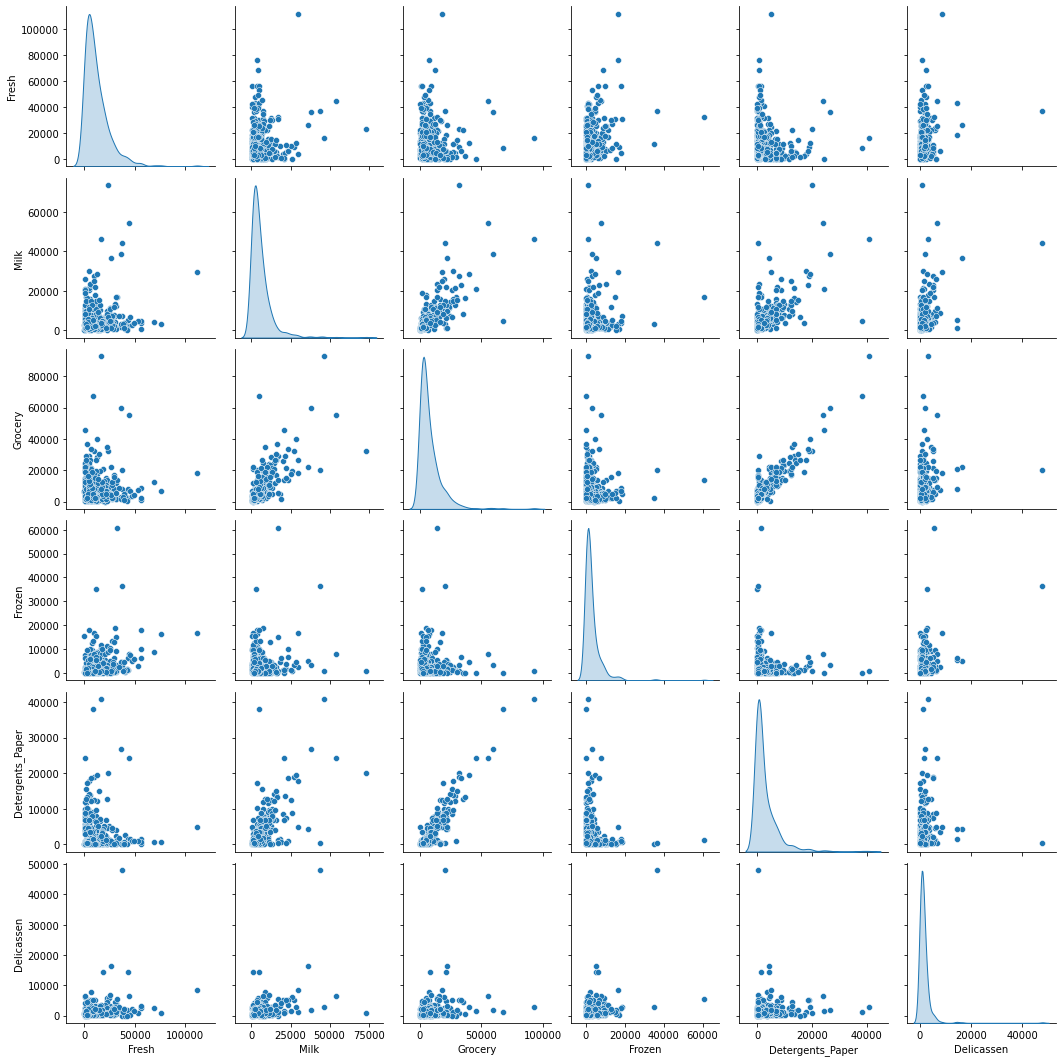

In [14]:
# Print the header of the `wholesale` dataset
print(wholesale.head())

# Plot the pairwise relationships between the variables
sns.pairplot(wholesale, diag_kind='kde')

# Display the chart
plt.show()

In [15]:
averages = wholesale.mean()
std_devs = wholesale.std()

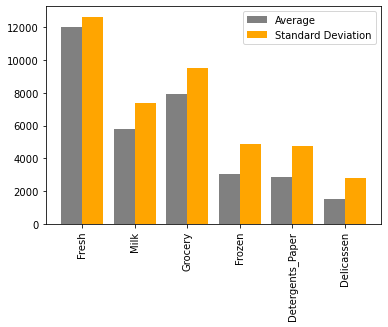

In [16]:
# Create column names list and same length integer list
x_names = wholesale.columns
x_ix = np.arange(wholesale.shape[1])

# Plot the averages data in gray and standard deviations in orange 
plt.bar(x=x_ix-0.2, height=averages, color='grey', label='Average', width=0.4)
plt.bar(x=x_ix+0.2, height=std_devs, color='orange', label='Standard Deviation', width=0.4)

# Add x-axis labels and rotate
plt.xticks(ticks=x_ix, labels=x_names, rotation=90)

# Add the legend and display the chart
plt.legend()
plt.show()

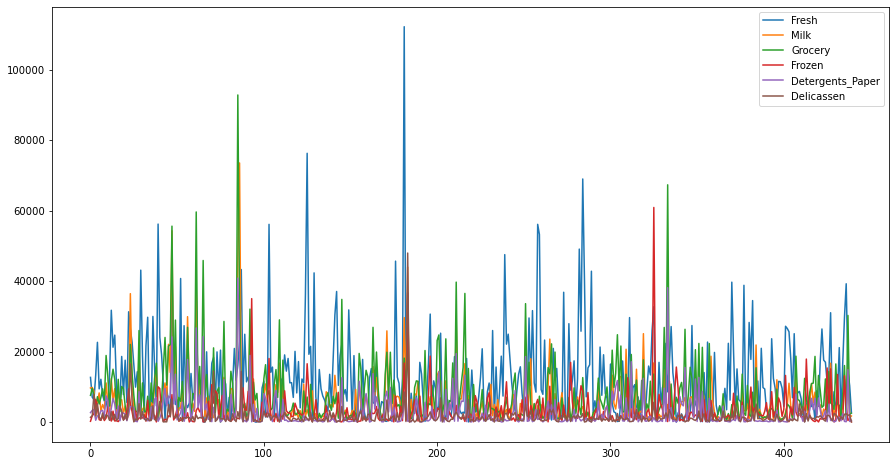

In [17]:
# The values vary a lot compared to the mean
# you can see that visxually - the variables are spiky.
wholesale.plot(figsize=(15,8))
plt.show()

In [27]:
# Kmeans needs normally distributed data. Our variables are skewed.
# Let's transform them to get them much closer to normal
import scipy.stats as stats

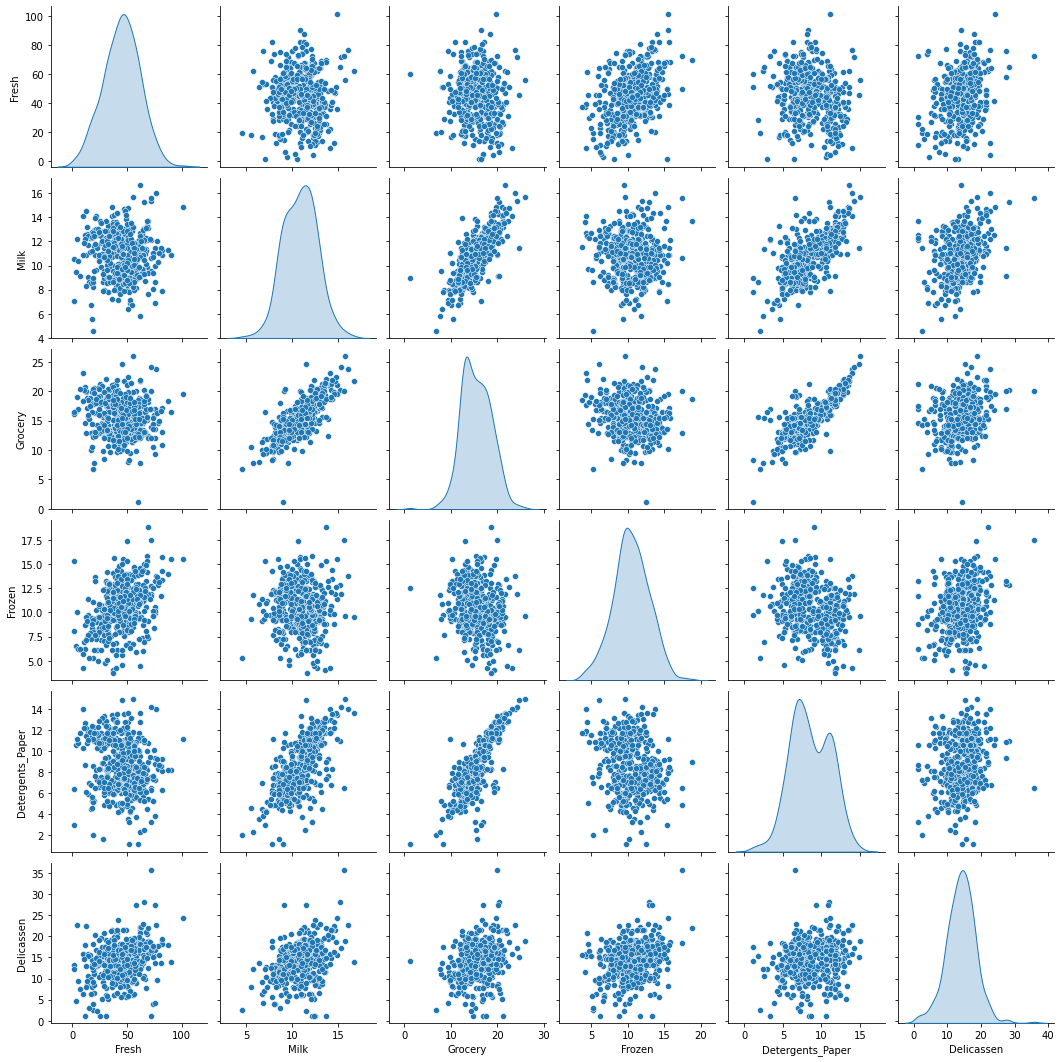

In [28]:
# Define custom Box Cox transformation function
def boxcox_df(x):
    x_boxcox, _ = stats.boxcox(x)
    return x_boxcox

# Apply the function to the `wholesale` dataset
wholesale_boxcox = wholesale.apply(boxcox_df, axis=0)

# Plot the pairwise relationships between the transformed variables 
sns.pairplot(wholesale_boxcox, diag_kind='kde')

# Display the chart
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [32]:
# Fit the initialized `scaler` instance on the Box-Cox transformed dataset
scaler.fit(wholesale_boxcox)

# Transform and store the scaled dataset as `wholesale_scaled`
wholesale_scaled = scaler.transform(wholesale_boxcox)

# Create a `pandas` DataFrame from the scaled dataset
wholesale_scaled_df = pd.DataFrame(data=wholesale_scaled,
                                       index=wholesale_boxcox.index,
                                       columns=wholesale_boxcox.columns)

# Print the mean and standard deviation for all columns
print(wholesale_scaled_df.agg(['mean','std']).round())

      Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
mean   -0.0   0.0     -0.0    -0.0              -0.0         0.0
std     1.0   1.0      1.0     1.0               1.0         1.0


In [33]:
from sklearn.cluster import KMeans

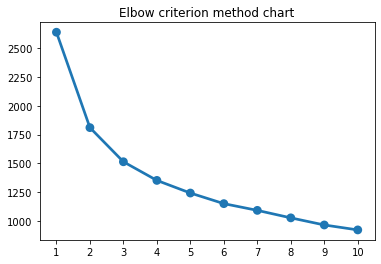

In [36]:
# Create empty sse dictionary
sse = {}

# Fit KMeans algorithm on k values between 1 and 11
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(wholesale_scaled_df)
    sse[k] = kmeans.inertia_

# Add the title to the plot
plt.title('Elbow criterion method chart')

# Create and display a scatter plot
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [37]:
# Import `KMeans` module
from sklearn.cluster import KMeans

# Initialize `KMeans` with 4 clusters
kmeans=KMeans(n_clusters=4, random_state=123)

# Fit the model on the pre-processed dataset
kmeans.fit(wholesale_scaled_df)

# Assign the generated labels to a new column
wholesale_kmeans4 = wholesale.assign(segment = kmeans.labels_)

In [38]:
wholesale_kmeans4

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,segment
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,3
436,39228,1431,764,4510,93,2346,3
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [39]:
# Import the non-negative matrix factorization module
from sklearn.decomposition import NMF

# Initialize NMF instance with 4 components
nmf = NMF(4)

# Fit the model on the wholesale sales data
nmf.fit(wholesale)

# Extract the components 
components = pd.DataFrame(data=nmf.components_, columns=wholesale.columns)

/home/bosullivan/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [40]:
components

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,644.386601,0.000000,29.901447,0.000000,0.00000,5.271346
1,1.329201,41.730268,436.532959,3.540971,208.13507,0.000000
2,0.000000,588.637507,50.211677,0.000000,0.00000,93.633675
3,4.227933,0.000000,54.079977,409.829740,0.00000,92.708396


In [41]:
# Import `KMeans` module
from sklearn.cluster import KMeans

# Initialize `KMeans` with 3 clusters
kmeans=KMeans(n_clusters=3, random_state=123)

# Fit the model on the pre-processed dataset
kmeans.fit(wholesale_scaled_df)

# Assign the generated labels to a new column
wholesale_kmeans3 = wholesale.assign(segment = kmeans.labels_)

In [42]:
# Import the non-negative matrix factorization module
from sklearn.decomposition import NMF

# Initialize NMF instance with 3 components
nmf = NMF(3)

# Fit the model on the wholesale sales data
nmf.fit(wholesale)

# Extract the components 
components = pd.DataFrame(data=nmf.components_, columns=wholesale.columns)

/home/bosullivan/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


           Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicassen
segment                                                                 
0         9421.0   1984.0   2504.0  2301.0             439.0       640.0
1         6718.0  10354.0  15937.0  1323.0            7107.0      1409.0
2        23708.0   5813.0   5916.0  6808.0            1067.0      3169.0


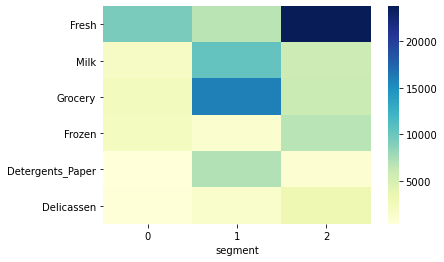

In [44]:
# Group by the segment label and calculate average column values
kmeans3_averages = wholesale_kmeans3.groupby(['segment']).mean().round(0)

# Print the average column values per each segment
print(kmeans3_averages)

# Create a heatmap on the average column values per each segment
sns.heatmap(kmeans3_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()

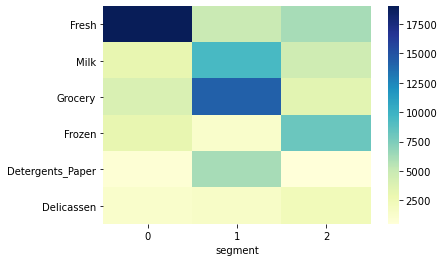

In [46]:
# Create the W matrix
W = pd.DataFrame(data=nmf.transform(wholesale), columns=components.index)
W.index = wholesale.index

# Assign the column name where the corresponding value is the largest
wholesale_nmf3 = wholesale.assign(segment = W.idxmax(axis=1))

# Calculate the average column values per each segment
nmf3_averages = wholesale_nmf3.groupby('segment').mean().round(0)

# Plot the average values as heatmap
sns.heatmap(nmf3_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()